<a href="https://colab.research.google.com/github/yoursmaddyy/Machine-Learning-Track/blob/main/augmentation_vs_baseline_testing_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import glob

# ==========================================
# 1. SETUP & DATA LOADING (The Bridge)
# ==========================================

# Define your specific path to the dataset
# Assumes folder structure:
# dataset/
#    images/ (contains .jpg)
#    labels/ (contains .txt)
DATASET_PATH = '/content/WildAfrica/WildAfrica'

# Define the 5 classes based on WildAfrica
class_names = ['buffalo', 'elephants', 'giraffes', 'zebras', 'rhinos']

In [ ]:
def load_data_from_folders(base_path, classes):
    data = []
    labels = []

    print(f"Scanning dataset at: {base_path}")

    for class_id, class_name in enumerate(classes):
        # Construct path: WildAfrica/WildAfrica/buffalo
        class_folder = os.path.join(base_path, class_name)

        # Check if folder exists
        if not os.path.exists(class_folder):
            print(f"WARNING: Folder not found: {class_folder}")
            continue

        # Find all images in this folder (jpg, jpeg, png)
        # We look for image files directly inside the animal folder
        image_files = glob.glob(os.path.join(class_folder, '*.jpg')) + \
                      glob.glob(os.path.join(class_folder, '*.jpeg')) + \
                      glob.glob(os.path.join(class_folder, '*.png'))

        print(f"Found {len(image_files)} images for class '{class_name}'")

        for img_path in image_files:
            try:
                # Read the image
                img = cv2.imread(img_path)

                if img is not None:
                    # Convert BGR (OpenCV standard) to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    data.append(img)
                    labels.append(class_id) # 0 for buffalo, 1 for elephant, etc.
                else:
                    print(f"Warning: Could not read image {img_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    return data, labels

# Load the data
X_raw, y_raw = load_data_from_folders(DATASET_PATH, class_names)

Scanning dataset at: /content/WildAfrica/WildAfrica
Found 179 images for class 'buffalo'
Found 119 images for class 'elephants'
Found 27 images for class 'giraffes'
Found 49 images for class 'zebras'
Found 109 images for class 'rhinos'


In [ ]:
if len(X_raw) == 0:
    print("ERROR: No data loaded. Please check your DATASET_PATH variable.")
else:
    print(f"\nTotal images loaded: {len(X_raw)}")


Total images loaded: 483


In [ ]:
# Step 2: Resize images to a consistent size
IMG_SIZE = 128
print("Resizing images... (This ensures inputs match the Neural Network)")
X = np.array([cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in X_raw])

# Step 3: Convert labels to NumPy array
y = np.array(y_raw)

# Normalize pixel values (0-255 -> 0-1)
X = X.astype('float32') / 255.0

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Resizing images... (This ensures inputs match the Neural Network)
Training Data Shape: (386, 128, 128, 3)
Testing Data Shape: (97, 128, 128, 3)


In [ ]:
model = models.Sequential()
# Input shape must match IMG_SIZE
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# Output layer: 5 neurons for 5 animals
model.add(layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Train the model
print("\nStarting Training...")


Starting Training...


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.3227 - loss: 1.7416 - val_accuracy: 0.3093 - val_loss: 1.4965
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2862 - loss: 1.5050 - val_accuracy: 0.1959 - val_loss: 1.5142
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3350 - loss: 1.4185 - val_accuracy: 0.3918 - val_loss: 1.5203
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4325 - loss: 1.3459 - val_accuracy: 0.4021 - val_loss: 1.2948
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5743 - loss: 1.0941 - val_accuracy: 0.5670 - val_loss: 1.0660
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5975 - loss: 1.0118 - val_accuracy: 0.5773 - val_loss: 1.0250
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6446 - loss: 0.8970 - val_accuracy: 0.6598 - val_loss: 0.8499
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7192 - loss: 0.7620 - val_accuracy: 0.6701 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc*100:.2f}%')

4/4 - 0s - 15ms/step - accuracy: 0.6186 - loss: 0.9719

Final Test Accuracy: 61.86%


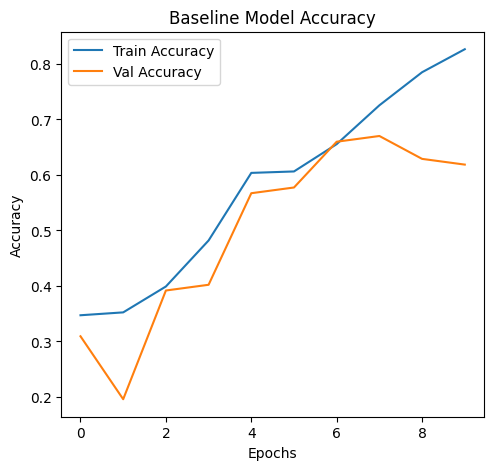

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Baseline Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step


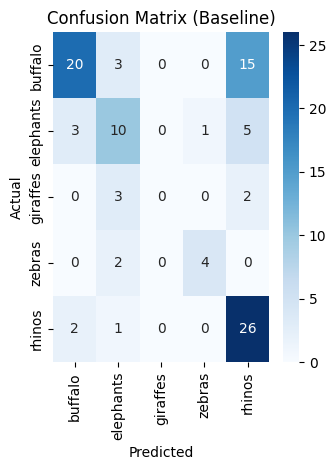

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Baseline)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ==========================================
# 1. DEFINE AUGMENTATION STRATEGY
# ==========================================

# Create an image generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate image +/- 20 degrees
    width_shift_range=0.2,  # Shift horizontally
    height_shift_range=0.2, # Shift vertically
    shear_range=0.2,        # Slant the image (change perspective)
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip left/right (essential for animals)
    fill_mode='nearest'     # How to fill empty pixels after rotation
)

# Fit the generator to your training data
datagen.fit(X_train)






Generating augmentation examples for report...


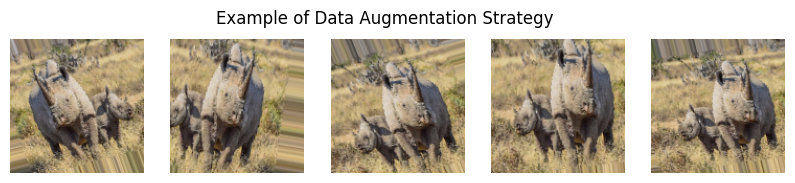

In [ ]:
# ==========================================
# 2. VISUALIZE AUGMENTATION (Required for Report)
# ==========================================

# Let's take one image (e.g., a Zebra) and see 5 augmented versions of it
# You should save the plot this produces for your report!
sample_img = X_train[0] # Take the first image
sample_img = np.expand_dims(sample_img, 0) # reshape for generator

plt.figure(figsize=(10, 2))
i = 0
print("Generating augmentation examples for report...")
for batch in datagen.flow(sample_img, batch_size=1):
    plt.subplot(1, 5, i+1)
    img_plot = batch[0]
    plt.imshow(img_plot)
    plt.axis('off')
    i += 1
    if i % 5 == 0:
        break
plt.suptitle("Example of Data Augmentation Strategy")
plt.show()

In [ ]:
# ==========================================
# 3. TRAIN WITH AUGMENTATION
# ==========================================

# We use the SAME model structure to ensure a fair comparison
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(64, activation='relu'))
model_aug.add(layers.Dense(5, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_aug.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nStarting Enhanced Training...")
# Note: We use model.fit with the datagen.flow iterator now
history_aug = model_aug.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15, # Increased epochs because augmentation makes learning harder (but better)
    validation_data=(X_test, y_test)
)



Starting Enhanced Training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.3200 - loss: 1.6701 - val_accuracy: 0.3918 - val_loss: 1.4414
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.3710 - loss: 1.4632 - val_accuracy: 0.4845 - val_loss: 1.4608
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.3954 - loss: 1.4463 - val_accuracy: 0.4742 - val_loss: 1.2580
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.4077 - loss: 1.3101 - val_accuracy: 0.4948 - val_loss: 1.2976
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.4638 - loss: 1.3222 - val_accuracy: 0.5773 - val_loss: 1.1842
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.4797 - loss: 1.2661 - val_accuracy: 0.5258 - val_loss: 1.1309
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.5647 - loss: 1.1097 - val_accuracy: 0.2784 - val_loss: 1.4625
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4089 - loss: 1.2904 - val_accuracy: 0.

4/4 - 0s - 14ms/step - accuracy: 0.4227 - loss: 1.9508

Baseline Accuracy: 61.86% (From previous run)
Augmented Accuracy: 42.27%


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step


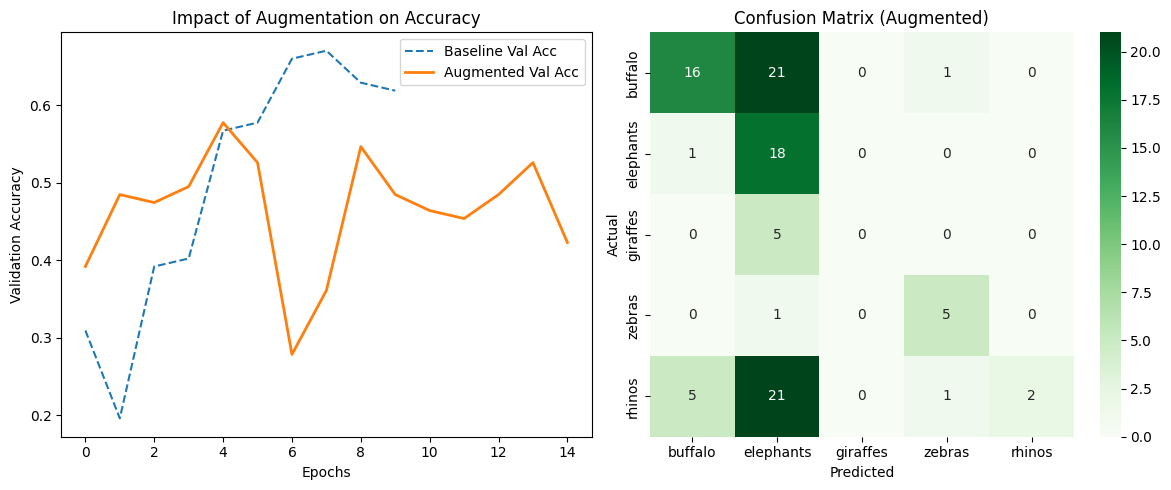

In [ ]:
# 4. COMPARE RESULTS
# ==========================================

test_loss_aug, test_acc_aug = model_aug.evaluate(X_test, y_test, verbose=2)
print(f'\nBaseline Accuracy: {test_acc*100:.2f}% (From previous run)')
print(f'Augmented Accuracy: {test_acc_aug*100:.2f}%')

# Plot Comparison
plt.figure(figsize=(12, 5))

# Plot Baseline (Previous run)
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Baseline Val Acc', linestyle='--')
plt.plot(history_aug.history['val_accuracy'], label='Augmented Val Acc', linewidth=2)
plt.title('Impact of Augmentation on Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Plot Confusion Matrix for Augmented Model
y_pred_probs_aug = model_aug.predict(X_test)
y_pred_aug = np.argmax(y_pred_probs_aug, axis=1)
cm_aug = confusion_matrix(y_test, y_pred_aug)

plt.subplot(1, 2, 2)
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Augmented)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# REVISED STRATEGY: Gentle Augmentation
# ==========================================

# 1. We reduce the "noise" (make it easier for the model)
datagen = ImageDataGenerator(
    rotation_range=10,      # Reduced from 20 to 10
    width_shift_range=0.1,  # Reduced from 0.2 to 0.1
    height_shift_range=0.1, # Reduced from 0.2 to 0.1
    zoom_range=0.1,         # Reduced from 0.2 to 0.1
    horizontal_flip=True,   # Keep this, it's very useful
    fill_mode='nearest'
)

datagen.fit(X_train)

# 2. Reset the model (Re-initialize so we don't start from the failed state)
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(64, activation='relu'))
model_aug.add(layers.Dense(5, activation='softmax'))

model_aug.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nStarting 'Gentle' Augmented Training (25 Epochs)...")

# 3. Increase Epochs to give it time to learn the variations
history_aug = model_aug.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=25, # Increased to allow convergence
    validation_data=(X_test, y_test)
)

# Evaluation
test_loss_aug, test_acc_aug = model_aug.evaluate(X_test, y_test, verbose=2)
print(f'\nNew Augmented Accuracy: {test_acc_aug*100:.2f}%')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Starting 'Gentle' Augmented Training (25 Epochs)...
Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.3188 - loss: 2.0490 - val_accuracy: 0.3814 - val_loss: 1.4154
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.3459 - loss: 1.4799 - val_accuracy: 0.3918 - val_loss: 1.4115
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.3742 - loss: 1.4487 - val_accuracy: 0.4639 - val_loss: 1.3331
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3956 - loss: 1.3930 - val_accuracy: 0.4845 - val_loss: 1.2913
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5083 - loss: 1.1767 - val_accuracy: 0.5773 - val_loss: 1.0401
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.5401 - loss: 1.1262 - val_accuracy: 0.4948 - val_loss: 1.2783
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5538 - loss: 1.1057 - val_accuracy: 0.5979 - val_loss: 1.1138
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step

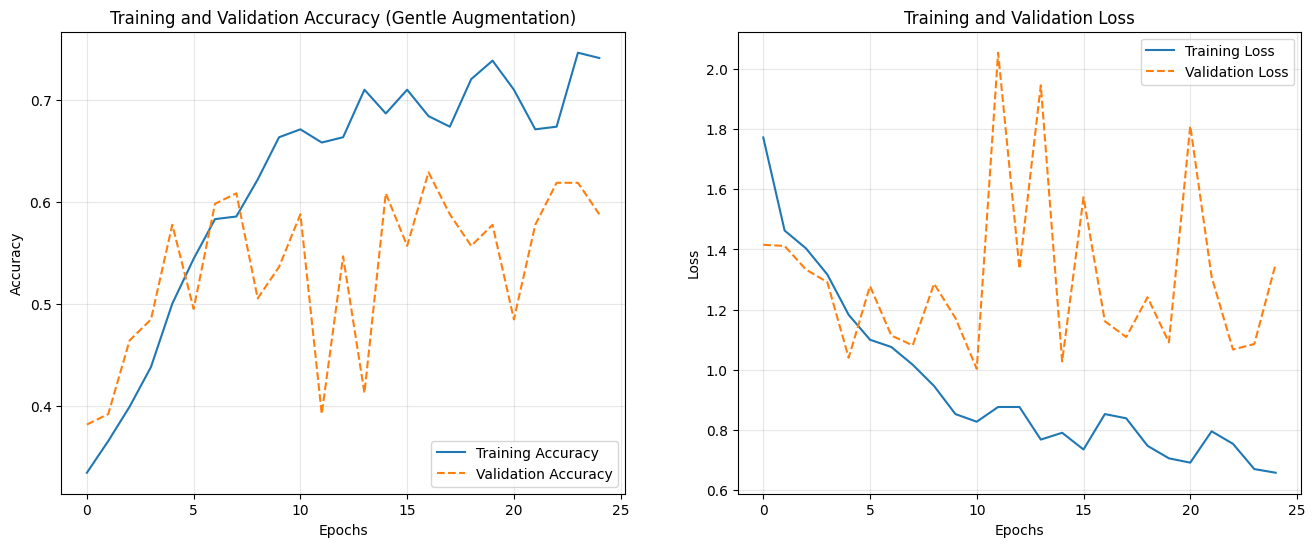

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step


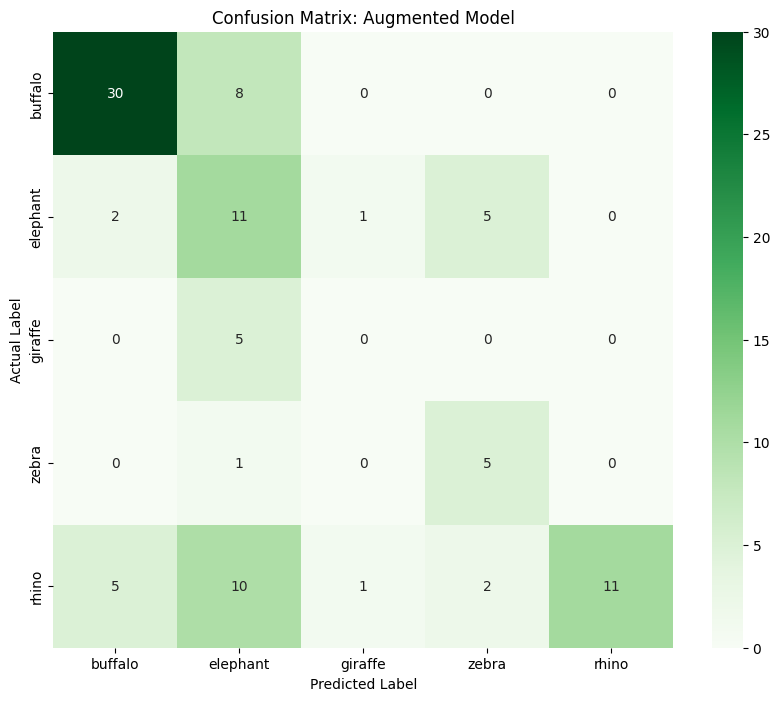

In [ ]:
# Define class names again to be safe
class_names = ['buffalo', 'elephant', 'giraffe', 'zebra', 'rhino']

# ==========================================
# 1. ACCURACY & LOSS CURVES
# ==========================================
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(16, 6))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle='--')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Gentle Augmentation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='--')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

plt.show()

# ==========================================
# 2. CONFUSION MATRIX
# ==========================================

# Get predictions
y_pred_probs = model_aug.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix: Augmented Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

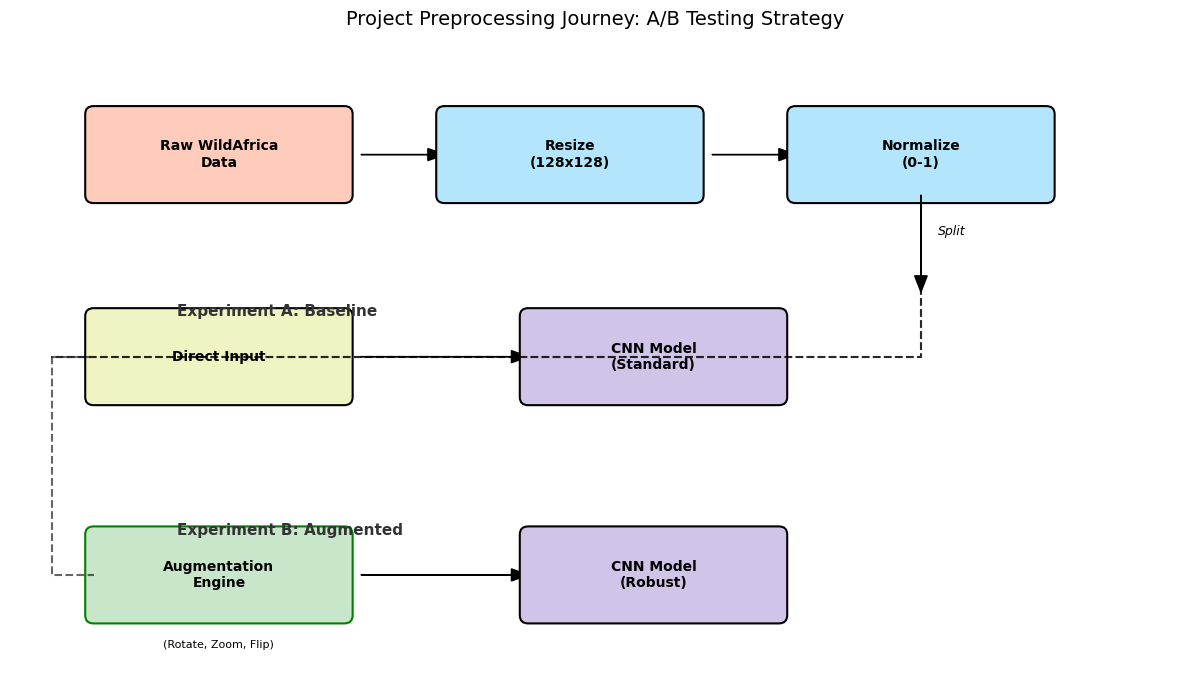

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_box(ax, text, x, y, color='#E0E0E0', ec='black'):
    # Create a fancy box
    box = patches.FancyBboxPatch((x, y), 3, 1, boxstyle="round,pad=0.1",
                                 linewidth=1.5, edgecolor=ec, facecolor=color)
    ax.add_patch(box)
    ax.text(x + 1.5, y + 0.5, text, ha='center', va='center', fontsize=10, fontweight='bold')
    return x + 3, y + 0.5 # Return connection point

plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.set_xlim(0, 14)
ax.set_ylim(0, 8)
ax.axis('off')

# 1. Common Steps
draw_box(ax, "Raw WildAfrica\nData", 1, 6, color='#FFCCBC') # Orange
ax.arrow(4.2, 6.5, 0.8, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')

draw_box(ax, "Resize\n(128x128)", 5.2, 6, color='#B3E5FC') # Blue
ax.arrow(8.4, 6.5, 0.8, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')

draw_box(ax, "Normalize\n(0-1)", 9.4, 6, color='#B3E5FC') # Blue

# Arrow splitting down
ax.arrow(10.9, 6, 0, -1.0, head_width=0.15, head_length=0.2, fc='k', ec='k')
ax.text(11.1, 5.5, "Split", fontsize=9, style='italic')

# 2. Branch A (Baseline)
ax.text(2, 4.5, "Experiment A: Baseline", fontsize=11, fontweight='bold', color='#333')
draw_box(ax, "Direct Input", 1, 3.5, color='#F0F4C3')
ax.arrow(4.2, 4.0, 1.8, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')
draw_box(ax, "CNN Model\n(Standard)", 6.2, 3.5, color='#D1C4E9')

# 3. Branch B (Augmented)
ax.text(2, 1.8, "Experiment B: Augmented", fontsize=11, fontweight='bold', color='#333')
draw_box(ax, "Augmentation\nEngine", 1, 0.8, color='#C8E6C9', ec='green')
ax.text(2.5, 0.4, "(Rotate, Zoom, Flip)", fontsize=8, ha='center')

ax.arrow(4.2, 1.3, 1.8, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')
draw_box(ax, "CNN Model\n(Robust)", 6.2, 0.8, color='#D1C4E9')

# Connection lines from top
# Line to A
ax.plot([10.9, 10.9, 0.5, 0.5, 1], [5, 4, 4, 4, 4], color='black', linestyle='--', alpha=0.6)
# Line to B
ax.plot([10.9, 10.9, 0.5, 0.5, 1], [5, 4, 4, 1.3, 1.3], color='black', linestyle='--', alpha=0.6)

plt.title("Project Preprocessing Journey: A/B Testing Strategy", fontsize=14)
plt.tight_layout()
plt.show()